# Appendix - Python Code and Outputs

### Data Preparation

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Import Extracted Training Data

In [2]:
import numpy as np
import pandas as pd
# load training data
disaster_training_data = pd.read_csv('train.csv')

# show first rows of the data
disaster_training_data.head(10)

# show number of columns and rows
disaster_training_data.shape

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


(7613, 5)

In [3]:
# drop id column from training data
disaster_training_data.drop(columns = 'id', inplace=True)

# show first ten rows
disaster_training_data.head(10)

,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,NaN,NaN,There's an emergency evacuation happening now ...,1
9,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


### Investigation of Missing Data and Outliers in Training Data

In [4]:
# find null counts, percentage of null values, and column type
null_count = disaster_training_data.isnull().sum()
null_percentage = disaster_training_data.isnull().sum() * 100 / len(disaster_training_data)
column_type = disaster_training_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type
location,2533,33.272035,object
keyword,61,0.801261,object


The above analysis displays that location is missing from 2533 rows and keyword is missing from 61 rows in the training data.

In [5]:
# deal with missing values

# fill missing keyword with unknown
disaster_training_data['keyword'].fillna('unknown', inplace=True)

# fill missing location with unknown
disaster_training_data['location'].fillna('unknown', inplace=True)

# add keyword and location to tweets
disaster_training_data['text'] = disaster_training_data['text'] + ' ' + disaster_training_data['keyword']+ ' ' + disaster_training_data['location']

# find null counts, percentage of null values, and column type
null_count = disaster_training_data.isnull().sum()
null_percentage = disaster_training_data.isnull().sum() * 100 / len(disaster_training_data)
column_type = disaster_training_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type


### Import Testing Data

In [6]:
# import test dataset
disaster_testing_data = pd.read_csv('test.csv')

# show first ten rows of the data
disaster_testing_data.head(10)

# show number of columns and rows
disaster_testing_data.shape

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


(3263, 4)

### Investigation of Missing Data and Outliers in Testing Data

In [7]:
# find null counts, percentage of null values, and column type
null_count = disaster_testing_data.isnull().sum()
null_percentage = disaster_testing_data.isnull().sum() * 100 / len(disaster_testing_data)
column_type = disaster_testing_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type
location,1105,33.864542,object
keyword,26,0.796813,object


The above analysis displays that location is missing from 1105 rows and keyword is missing from 26 rows in the testing data.

In [8]:
# deal with missing values

# fill missing keyword with unknown
disaster_testing_data['keyword'].fillna('unknown', inplace=True)

# fill missing location with unknown
disaster_testing_data['location'].fillna('unknown', inplace=True)

# add keyword and location to tweets
disaster_testing_data['text'] = disaster_testing_data['text'] + ' ' + disaster_testing_data['keyword']+ ' ' + disaster_testing_data['location']

# find null counts, percentage of null values, and column type
null_count = disaster_testing_data.isnull().sum()
null_percentage = disaster_testing_data.isnull().sum() * 100 / len(disaster_training_data)
column_type = disaster_testing_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type


### Plot target counts

[Text(0.5, 1.0, 'Target Groups')]

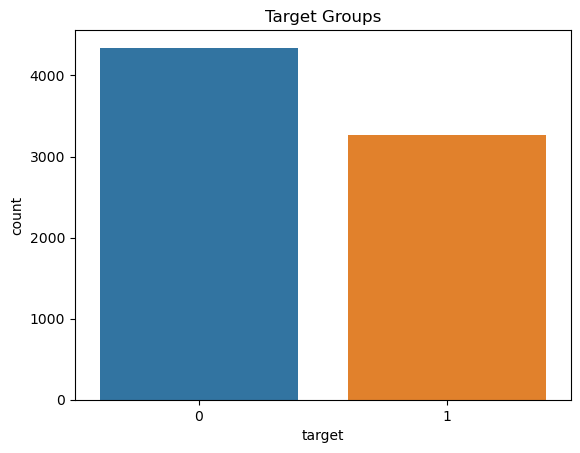

In [9]:
import seaborn as sns
import plotly as plt
sns.countplot(x='target', data=disaster_training_data).set(title = 'Target Groups')

In [10]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, Flatten, Embedding, GRU, Bidirectional, GlobalMaxPooling1D, Reshape, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer

We must pre-process the disaster tweet data to prepare it for the LSTM model

In [11]:
# Define parameters
max_features = 10000
maxlen = 40
batch_size = 32

from sklearn.model_selection import train_test_split
# extract tweet label
tweet_text = disaster_training_data['text']

# convert to numpy array
tweet_text = np.array(tweet_text)
tweet_text = tweet_text.reshape(-1)

# extract tweet label
tweet_label = disaster_training_data['target']

# convert to numpy array
tweet_label = np.array(tweet_label)
tweet_label = tweet_label.reshape(-1)


# extract tweet text
X_train, X_valid, y_train, y_valid = train_test_split(tweet_text, tweet_label, test_size=0.2, random_state=10)

In [12]:
# Tokenize and Pre-process the training, validation, and testing data ahead of fitting RNN / LSTM model

# create the tokenizer
t = Tokenizer()

# fit the tokenizer on the documents
t.fit_on_texts(X_train)

# summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)

# integer encode documents
encoded_docs_train = t.texts_to_matrix(X_train, mode='tfidf')
print(encoded_docs_train)


OrderedDict([('msmigot', 1), ('wow', 17), ('what', 169), ('convincing', 1), ('amp', 272), ('compelling', 1), ('evidence', 5), ('to', 1604), ('change', 39), ('my', 562), ('view', 14), ('that', 449), ('is', 733), ('climate', 12), ('deniers', 1), ('i', 1114), ('tend', 1), ('destroy', 71), ('by', 422), ('giving', 11), ('paulton', 1), ('england', 64), ('http', 3464), ('t', 3812), ('co', 3817), ('igxrqpotm7', 1), ('bin', 9), ('laden', 9), ('family', 35), ('plane', 25), ('crashed', 61), ('after', 210), ("'avoiding", 7), ('microlight', 7), ('and', 1145), ('landi', 1), ('3kpbu6hgt5', 1), ('peritoengrafoscopia', 1), ('cuernavaca', 1), ('morelos', 1), ('mì©xico', 3), ('70', 36), ('years', 63), ('atomic', 43), ('bombs', 12), ('japan', 54), ('still', 107), ('struggles', 9), ('with', 472), ('war', 88), ('past', 28), ('the', 2679), ('anniversary', 25), ('of', 1530), ('devastation', 60), ('wrought', 11), ('b', 30), ('bs6xaqhsim', 1), ('brasil', 5), ('pyrbliss', 1), ('ah', 7), ('remember', 22), ('those

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.8062716  1.80522951 ... 0.         0.         0.        ]
 [0.         1.06681311 1.06619763 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.8062716  1.80522951 ... 8.02158453 0.         0.        ]
 [0.         1.06681311 1.06619763 ... 0.         8.02158453 8.02158453]]


In [13]:
# Apply Tokenizer to the validation and testing data as well
encoded_docs_validation = t.texts_to_matrix(X_valid, mode='tfidf')

testing_tweet_text = disaster_testing_data['text']
testing_tweet_text = np.array(testing_tweet_text)
testing_tweet_text = testing_tweet_text.reshape(-1)

encoded_docs_testing = t.texts_to_matrix(testing_tweet_text, mode='tfidf')

Next, we apply padding to the predictive data sequences

In [14]:
from keras import utils
X_train = utils.pad_sequences(encoded_docs_train, maxlen = maxlen)
X_valid = utils.pad_sequences(encoded_docs_validation, maxlen = maxlen)
X_test = utils.pad_sequences(encoded_docs_testing, maxlen = maxlen)
print(len(X_train), 'train sequences')
print(len(X_valid), 'validation sequences')
print(len(X_test), 'test sequences')

6090 train sequences
1523 validation sequences
3263 test sequences


In [15]:
# Build Initial Sequential Model
model = Sequential()
# embedding layer (100x100x100)
model.add(Embedding(max_features, 100))

# GRU layer
model.add(Bidirectional(GRU(units=32, return_sequences=True, dropout = 0.2, recurrent_dropout = 0.2)))
#model.add(GRU(units=64, return_sequences=True))
#model.add(LSTM(32, dropout = 0.2, recurrent_dropout = 0.2))


# Batch Normalization to improve training speed and performance
model.add(BatchNormalization())
model.add(GlobalMaxPooling1D())

# We add a dense hidden layer:
#model.add(Dense(32, activation="relu"))
#model.add(Dropout(0.5))

# # project onto a single unit output layer, and use sigmoid activation func
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         1000000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 64)         25728     
 l)                                                              
                                                                 
 batch_normalization (BatchN  (None, None, 64)         256       
 ormalization)                                                   
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                        

In [16]:
# Adam solver optimizer with learning rate of 0.001
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(loss='binary_crossentropy', 
              optimizer=optimizer,
             metrics=['accuracy'])

# Fit the model
model.fit(X_train,
          y_train,
          batch_size = batch_size,
          epochs = 10,
          validation_data = (X_valid, y_valid))

Epoch 1/10
191/191 [==============================] - 21s 76ms/step - loss: 0.6919 - accuracy: 0.5558 - val_loss: 0.6874 - val_accuracy: 0.5653
Epoch 2/10
191/191 [==============================] - 15s 78ms/step - loss: 0.6910 - accuracy: 0.5552 - val_loss: 0.6939 - val_accuracy: 0.4353
Epoch 3/10
191/191 [==============================] - 14s 75ms/step - loss: 0.6908 - accuracy: 0.5494 - val_loss: 0.6854 - val_accuracy: 0.5653
Epoch 4/10
191/191 [==============================] - 15s 76ms/step - loss: 0.6881 - accuracy: 0.5581 - val_loss: 0.7003 - val_accuracy: 0.5653
Epoch 5/10
191/191 [==============================] - 15s 76ms/step - loss: 0.6886 - accuracy: 0.5589 - val_loss: 0.6856 - val_accuracy: 0.5653
Epoch 6/10
191/191 [==============================] - 14s 75ms/step - loss: 0.6870 - accuracy: 0.5631 - val_loss: 0.6860 - val_accuracy: 0.5653
Epoch 7/10
191/191 [==============================] - 15s 77ms/step - loss: 0.6872 - accuracy: 0.5588 - val_loss: 0.8120 - val_accuracy:

Let's now apply our model to the training data.

In [17]:
# Apply the model to the validation dataset
rnn_predictions_training_v1 = model.predict(X_train, verbose = 1)

# Put the label predictions into a dataframe
rnn_predictions_training_v1_df = pd.DataFrame(rnn_predictions_training_v1, columns=['label'])


191/191 [==============================] - 4s 11ms/step


Let's find the cutoff value that we can use for tranforming the model predictions into zeros and ones that will maximize the accuracy of the model predictions for the training data.

In [18]:
rnn_predictions_training_v1_df.rename(columns={"label": "predicted_label"}, inplace=True)
rnn_predictions_training_v1_df

y_training_v1_df = pd.DataFrame(y_train, columns = ['true_label'])
y_training_v1_df

training_df_v1 = y_training_v1_df.join(rnn_predictions_training_v1_df)


Positives = training_df_v1[training_df_v1["true_label"].isin([1])]
Negatives = training_df_v1[training_df_v1["true_label"].isin([0])]

Positive_Count = Positives.shape[0]
Negative_Count = Negatives.shape[0]

Prediction_Cutoff = np.arange(0, 1, 0.0001).tolist()
Cutoff_df = pd.DataFrame(Prediction_Cutoff, columns=['Prediction_Cutoff'])

Sensitivity_List = []
False_Positive_List = []
Precision_List = []

for pc in Cutoff_df['Prediction_Cutoff']:
    true_positive_count = (Positives['predicted_label'] >= pc).sum()
    Sensitivity_List.append(true_positive_count / Positive_Count)
    false_positive_count = (Negatives['predicted_label'] >= pc).sum()
    False_Positive_List.append(false_positive_count / Negative_Count)
    Precision_List.append(true_positive_count / (true_positive_count + false_positive_count))     

Cutoff_df['Sensitivity'] = Sensitivity_List
Cutoff_df['False Positive Rate'] = False_Positive_List
Cutoff_df['Precision'] = Precision_List


,predicted_label
0,0.419826
1,0.419826
2,0.419826
3,0.419826
4,0.419826
...,...
6085,0.544910
6086,0.614686
6087,0.419826
6088,0.667563


,true_label
0,0
1,1
2,1
3,1
4,0
...,...
6085,1
6086,1
6087,1
6088,1


C:\Users\steve\AppData\Local\Temp\ipykernel_27012\3288542112.py:28: RuntimeWarning: invalid value encountered in scalar divide
  Precision_List.append(true_positive_count / (true_positive_count + false_positive_count))


In [19]:
Cutoff_df['Specificity'] = 1 - Cutoff_df['False Positive Rate'] 
Cutoff_df['Percent_Correctly_Predicted_In_Validation_DF'] = ( ( Positives.shape[0] * Cutoff_df['Specificity'] ) + (Negatives.shape[0] * Cutoff_df['Sensitivity']) ) / (Positives.shape[0] + Negatives.shape[0] )

Cutoff_Shortlist_df = Cutoff_df[Cutoff_df.Percent_Correctly_Predicted_In_Validation_DF == Cutoff_df.Percent_Correctly_Predicted_In_Validation_DF.max()]

Optimal_Cutoff = Cutoff_Shortlist_df['Prediction_Cutoff'].median()

print(f"The optimal cutoff boundary for predicting survivals for this model is {Optimal_Cutoff:.4f}.")

The optimal cutoff boundary for predicting survivals for this model is 0.2099.


Now, we apply this model to the test dataset

In [20]:
# Apply the cnn model to the test dataset
rnn_predictions_test_v1 = model.predict(X_test, verbose = 1)

# Put the label predictions into a dataframe
rnn_pred1_df = pd.DataFrame(rnn_predictions_test_v1, columns=['prediction'])

# Convert predictions into 1s and 0s
rnn_pred1_df['target'] = np.where(rnn_pred1_df['prediction'] < 0.2099, 0, 1)

# Drop the raw prediction value and just keep the new target value (of zeros and ones)
rnn_pred1_df.drop(columns = 'prediction', inplace=True)

rnn_pred1_df

102/102 [==============================] - 1s 11ms/step


,target
0,1
1,1
2,1
3,1
4,1
...,...
3258,1
3259,1
3260,1
3261,1


Now we save these test dataset predictions into a CSV file for submission into Kaggle.

In [21]:

# Add the ID column to the front of the cnn predictions dataframe
rnn_pred1_df.insert(0, 'id', disaster_testing_data['id'])

# Output predictions to csv
rnn_pred1_df.to_csv('test_predictions_rnn_v1.csv', index=False)

Having obtained our F1 score from Kaggle, we now display the results below.

<Figure size 1500x1500 with 0 Axes>

(-0.5, 1039.5, 222.5, -0.5)

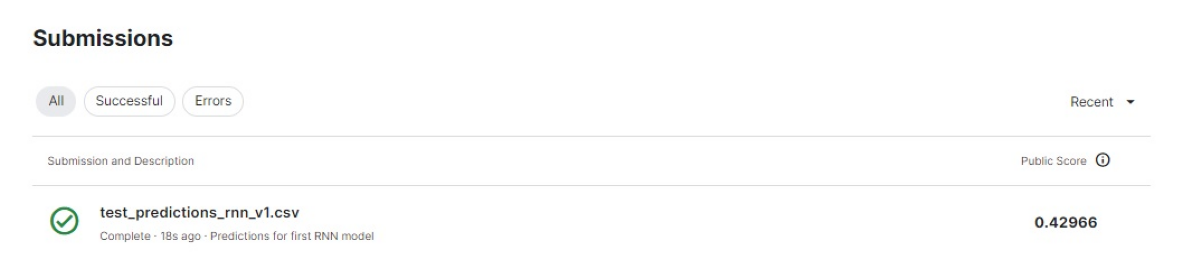

In [22]:
# Display the kaggle results 
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 15))
kaggle_results = plt.imread('Kaggle_results_rnn_v1.jpg')
plt.imshow(kaggle_results)
plt.axis("off")
plt.show()

## Model 2:

### Preprocessing

In [11]:
from wordsegment import load, segment
import re, glob, datetime
import unicodedata2
import matplotlib.pyplot as plt
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import nltk
import numpy as np
import pandas as pd
import seaborn as sns

In [12]:
# load training data
model2_train_df = pd.read_csv('train.csv')

# fill missing keyword with unknown
model2_train_df['keyword'].fillna('unknown', inplace=True)

# fill missing keyword with unknown
model2_train_df['location'].fillna('unknown', inplace=True)

# add keyword and location to tweets
model2_train_df['text'] = model2_train_df['text'] + ' ' + model2_train_df['keyword']+ ' ' + model2_train_df['location']

# Drop the LOCATION column from the copy of the training dataframe
model2_train_df.drop(['location'], axis=1, inplace=True)

# Drop the KEYWORD column from the copy of the training dataframe
model2_train_df.drop(['keyword'], axis=1, inplace=True)

# Drop the id column from the copy of the training dataframe
model2_train_df.drop(['id'], axis=1, inplace=True)

# Create a copy of the testing dataframe
model2_test_df = pd.read_csv('test.csv')

# fill missing keyword with unknown
model2_test_df['keyword'].fillna('unknown', inplace=True)

# fill missing keyword with unknown
model2_test_df['location'].fillna('unknown', inplace=True)

# add keyword and location to tweets
model2_test_df['text'] = model2_test_df['text'] + ' ' + model2_test_df['keyword']+ ' ' + model2_test_df['location']

# Drop the LOCATION column from the copy of the testing dataframe
model2_test_df.drop(['location'], axis=1, inplace=True)

# Drop the KEYWORD column from the copy of the testing dataframe
model2_test_df.drop(['keyword'], axis=1, inplace=True)

# Drop the ID column from the copy of the testing dataframe
model2_test_df.drop(['id'], axis=1, inplace=True)

Given that there is missingness in location, it was deleted

<Figure size 500x400 with 0 Axes>

C:\Users\mhurt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

Text(0.5, 0.98, 'Training data: Tweet word count histogram')

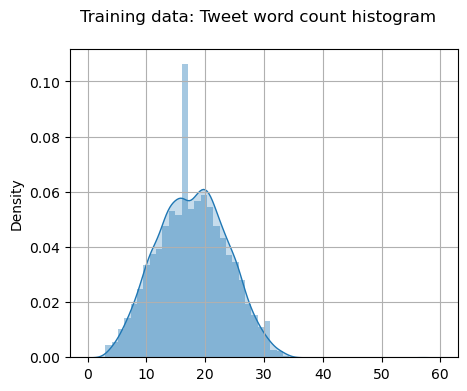

In [13]:
plt.figure(figsize=(5,4))
model2_train_df['Tweet_word_count'] = model2_train_df['text'].apply(lambda x: len(x.split(" ")) )
sns.distplot(model2_train_df['Tweet_word_count'].values, hist=True, kde=True, kde_kws={"shade": True})

plt.grid()
plt.suptitle("Training data: Tweet word count histogram")
plt.show()

# Drop the tweet word count column from the copy of the training dataframe
model2_train_df.drop(['Tweet_word_count'], axis=1, inplace=True)

#### Repeat for test data:

<Figure size 500x400 with 0 Axes>

C:\Users\mhurt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

Text(0.5, 0.98, 'Test data: Tweet word count histogram')

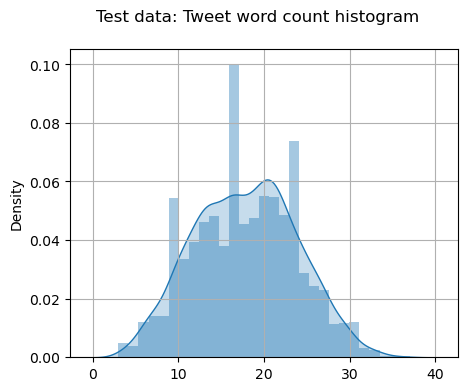

In [14]:
plt.figure(figsize=(5,4))
model2_test_df['Tweet_word_count'] = model2_test_df['text'].apply(lambda x: len(x.split(" ")) )
sns.distplot(model2_test_df['Tweet_word_count'].values, hist=True, kde=True, kde_kws={"shade": True})

plt.grid()
plt.suptitle("Test data: Tweet word count histogram")
plt.show()

# Drop the tweet word count column from the copy of the training dataframe
model2_test_df.drop(['Tweet_word_count'], axis=1, inplace=True)

### Remove URL prefixes before applying stop word and tokenization functions:

#### The following method utilizes regex to target any string beginning with “http” and capture the full string that follows:

In [15]:
def remove_urls(model2_train_df):
    model2_train_df['text'] = model2_train_df['text'].str.replace(r"http\S+", "")

#Apply function to training data:
remove_urls(model2_train_df)

def remove_urls(model2_test_df):
    model2_test_df['text'] = model2_test_df['text'].str.replace(r"http\S+", "")

#Apply function to test data:
remove_urls(model2_test_df)

C:\Users\mhurt\AppData\Local\Temp\ipykernel_21300\9265385.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  model2_train_df['text'] = model2_train_df['text'].str.replace(r"http\S+", "")
C:\Users\mhurt\AppData\Local\Temp\ipykernel_21300\9265385.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  model2_test_df['text'] = model2_test_df['text'].str.replace(r"http\S+", "")


### Stop Words:
Commonly used words in language provide important grammatical structure for human communication, they do little for machine interpretation. It is a convention to remove these words from our modeling vocabulary entirely. I’ll be using the standard english stop words from the NLTK(Natural Language ToolKit) library, and punctuation from the string library.

In [16]:
import string
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

#add punctuation char's to stopwords list
stop_words += list(string.punctuation) # <-- contains !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

#add integers
stop_words += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

### Tokenization:

Apply both tokenization and omission of stop words with the below function and apply it to the text column of the tweet text

In [69]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
def tokenize_lowercase(text):
    tokens = nltk.word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed
  
#Apply function to training data:
model2_train_df['text'] = model2_train_df['text'].apply(tokenize_lowercase)

#Apply function to test data:
model2_test_df['text'] = model2_test_df['text'].apply(tokenize_lowercase)

### Remove the remaining noise such as words containing integers, or any tokens that are not alphabetical.

In [18]:
def remove_nums(text_object):
    no_nums = list(filter(lambda x: x.isalpha(), text_object))
    return no_nums

#Apply function to training data:
model2_train_df['text'] = model2_train_df['text'].apply(remove_nums)

#Apply function to test data:
model2_test_df['text'] = model2_test_df['text'].apply(remove_nums)

### Lemmatization: keep the root of words only.

In [72]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [73]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
from nltk.stem import WordNetLemmatizer

#initialize lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatize_text(df_text):
    lemmatized =[]
    for w in df_text:
        lemmatized.append(lemmatizer.lemmatize(w))
    return lemmatized

#Apply function to training data:
model2_train_df['text'] = model2_train_df['text'].apply(lemmatize_text)

#Apply function to test data:
model2_test_df['text'] = model2_test_df['text'].apply(lemmatize_text)

### Prep data for the LSTM model

In [20]:
# Convert tweet text from lists into strings
model2_train_df['text_string'] = [' '.join(map(str, l)) for l in model2_train_df['text']]
model2_test_df['text_string'] = [' '.join(map(str, l)) for l in model2_test_df['text']]

# Drop the columns that include the tweets as lists from the training and testing dataframes
model2_train_df.drop(['text'], axis=1, inplace=True)
model2_test_df.drop(['text'], axis=1, inplace=True)

model2_train_df
model2_test_df

,target,text_string
0,1,deed reason earthquake may allah forgive u unk...
1,1,forest fire near la ronge sask canada unknown ...
2,1,resident asked place notified officer evacuati...
3,1,people receive wildfire evacuation order calif...
4,1,got sent photo ruby alaska smoke wildfire pour...
...,...,...
7608,1,two giant crane holding bridge collapse nearby...
7609,1,thetawniest control wild fire california even ...
7610,1,utc volcano hawaii unknown unknown
7611,1,police investigating collided car little portu...


,text_string
0,happened terrible car crash unknown unknown
1,heard earthquake different city stay safe ever...
2,forest fire spot pond goose fleeing across str...
3,apocalypse lighting spokane wildfire unknown u...
4,typhoon soudelor kill china taiwan unknown unk...
...,...
3258,earthquake safety los angeles safety fastener ...
3259,storm ri worse last hurricane city amp hardest...
3260,green line derailment chicago unknown unknown
3261,meg issue hazardous weather outlook hwo unknow...


#### Vectorize data for LSTM

In [152]:
#from sklearn.feature_extraction.text import TfidfVectorizer


#vectorizer = TfidfVectorizer(analyzer=lambda x: x)

#X_train = vectorizer.fit_transform(X_train)
#X_val = vectorizer.transform(X_val)
#X_test = vectorizer.transform(test_feature)

In [21]:
from sklearn.model_selection import train_test_split

feature = model2_train_df['text_string']
feature = np.array(feature)
feature = feature.reshape(-1)

label = model2_train_df['target']
label = np.array(label)
label = label.reshape(-1)

test_feature = model2_test_df['text_string']
test_feature = np.array(test_feature)
test_feature = test_feature.reshape(-1)

# split into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(
    feature, label, test_size=0.2, random_state=0, shuffle=True)

In [23]:
from keras.preprocessing.text import Tokenizer

# Tokenize and Pre-process the training, validation, and testing data ahead of fitting RNN / LSTM model

# create the tokenizer
t = Tokenizer()

# fit the tokenizer on the documents
t.fit_on_texts(X_train)

# summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)

# integer encode documents
encoded_docs_train = t.texts_to_matrix(X_train, mode='tfidf')
print(encoded_docs_train)


# Apply Tokenizer to the validation and testing data as well
encoded_docs_validation = t.texts_to_matrix(X_val, mode='tfidf')

testing_tweet_text = model2_test_df['text_string']
testing_tweet_text = np.array(testing_tweet_text)
testing_tweet_text = testing_tweet_text.reshape(-1)

encoded_docs_testing = t.texts_to_matrix(testing_tweet_text, mode='tfidf')

OrderedDict([('ted', 6), ('cruz', 10), ('fire', 342), ('back', 101), ('jeb', 8), ('amp', 276), ('bush', 41), ('lose', 7), ('republican', 9), ('like', 272), ('video', 135), ('unknown', 2067), ('first', 115), ('year', 118), ('forest', 95), ('service', 68), ('spent', 5), ('half', 26), ('annual', 6), ('budget', 7), ('fighting', 10), ('climatechange', 2), ('lightseraphs', 1), ('pissed', 2), ('could', 69), ('pikachu', 1), ('electrocute', 49), ('gon', 40), ('na', 65), ('fight', 28), ('taylor', 6), ('soon', 29), ('get', 203), ('apocalypse', 47), ('colorado', 36), ('sure', 23), ('covering', 1), ('head', 42), ('wound', 44), ('scab', 1), ('solution', 5), ('tampa', 8), ('fl', 41), ('breaking', 31), ('news', 158), ('unconfirmed', 15), ('heard', 29), ('loud', 70), ('bang', 30), ('nearby', 23), ('appears', 17), ('blast', 31), ('wind', 45), ('neighbour', 15), ('as', 41), ('kenya', 31), ('annihilation', 42), ('christie', 3), ('kasich', 1), ('le', 13), ('hour', 32), ('away', 33), ('please', 55), ('god',

[[0.         1.38925733 0.         ... 0.         0.         0.        ]
 [0.         1.38925733 0.         ... 0.         0.         0.        ]
 [0.         1.38925733 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 8.02158453 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         8.02158453 8.02158453]]


In [24]:
from keras import utils
maxlen = 40

X_train = utils.pad_sequences(encoded_docs_train, maxlen = maxlen)
X_val = utils.pad_sequences(encoded_docs_validation, maxlen = maxlen)
X_test = utils.pad_sequences(encoded_docs_testing, maxlen = maxlen)
print(len(X_train), 'train sequences')
print(len(X_val), 'validation sequences')
print(len(X_test), 'test sequences')

6090 train sequences
1523 validation sequences
3263 test sequences


### Build and run LSTM Model

In [26]:
import keras

In [27]:
embed_dim = 32
lstm_out = 32

max_features = 10000
batch_size = 32


model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.4))
model.add(Dense(1,activation='sigmoid'))



model.compile(loss = 'binary_crossentropy', optimizer= keras.optimizers.Adam(learning_rate=0.002) ,metrics = ['accuracy'])
print(model.summary())


model.fit(X_train,
          Y_train,
          batch_size = batch_size,
          epochs = 10,
          validation_data = (X_val, Y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 32)            320000    
                                                                 
 dropout_1 (Dropout)         (None, 40, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
191/191 [==============================] - 7s 27ms/step - loss: 0.6852 - accuracy: 0.5662 - val_loss: 0.6808 - val_accuracy: 0.5817
Epoch 2/10
191/191 [============

In [28]:
y_pred = model.predict(X_test).round()
    
y_pred

102/102 [==============================] - 1s 4ms/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [29]:
from sklearn import metrics
from functools import reduce
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [30]:
train_accuracy = round(metrics.accuracy_score(Y_train,model.predict(X_train).round())*100)
train_accuracy

191/191 [==============================] - 1s 4ms/step


57

48/48 [==============================] - 0s 4ms/step - loss: 0.6800 - accuracy: 0.5817
Score of Validation dataset predictions: 0.6799944043159485
Accuracy of Validation dataset predictions: 0.5817465782165527
48/48 [==============================] - 0s 4ms/step


Text(0.5, 1.0, 'ROC Curve')

The roc auc score is: 0.5007849293563579


Text(0.5, 1.0, 'Precision-Recall Curve')

The prec-recall auc score is: 0.46011300507264463


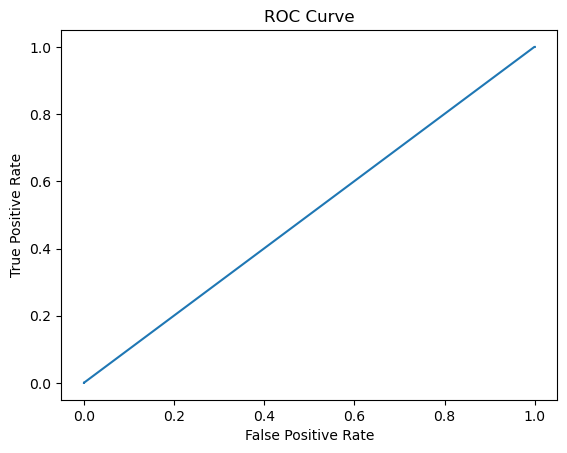

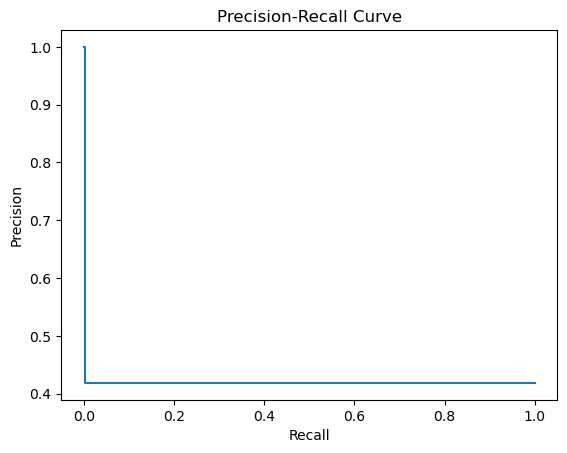

In [31]:
# Evaluate the model's performance on the validation dataset
score, accuracy = model.evaluate(X_val,
                               Y_val,
                               batch_size = batch_size)

print('Score of Validation dataset predictions:', score)
print('Accuracy of Validation dataset predictions:', accuracy)


# Apply the model to the validation dataset
rnn_lstm_predictions_validation_v2 = model.predict(X_val, verbose = 1)

#rnn_lstm_predictions_validation_v3 = model_v3.predict_classes(x_validation_v3, verbose = 1)


# Put the label predictions into a dataframe
rnn_lstm_predictions_validation_v2_df = pd.DataFrame(rnn_lstm_predictions_validation_v2, columns=['label'])

rnn_lstm_predictions_validation_v2_array = rnn_lstm_predictions_validation_v2_df['label'].to_numpy()

from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve
import matplotlib.pyplot as plt


# Curves
true_y = Y_val
predicted_y = rnn_lstm_predictions_validation_v2_array

fpr, tpr, _ = roc_curve(true_y, predicted_y)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('ROC Curve')
# roc auc score
auc1 = roc_auc_score(true_y, predicted_y)
print("The roc auc score is:", auc1)

prec, recall, _ = precision_recall_curve(true_y, predicted_y)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
plt.title('Precision-Recall Curve')# precision-recall auc score
auc2 = auc(recall, prec)
print("The prec-recall auc score is:", auc2)

In [32]:
rnn_lstm_predictions_validation_v2_df.rename(columns={"label": "predicted_label"}, inplace=True)
rnn_lstm_predictions_validation_v2_df

y_validation_v2_df = pd.DataFrame(Y_val, columns = ['true_label'])
y_validation_v2_df

validation_df = y_validation_v2_df.join(rnn_lstm_predictions_validation_v2_df)


Positives = validation_df[validation_df["true_label"].isin([1])]
Negatives = validation_df[validation_df["true_label"].isin([0])]

Positive_Count = Positives.shape[0]
Negative_Count = Negatives.shape[0]

Prediction_Cutoff = np.arange(0, 1, 0.0001).tolist()
Cutoff_df = pd.DataFrame(Prediction_Cutoff, columns=['Prediction_Cutoff'])

Sensitivity_List = []
False_Positive_List = []
Precision_List = []

for pc in Cutoff_df['Prediction_Cutoff']:
    true_positive_count = (Positives['predicted_label'] >= pc).sum()
    Sensitivity_List.append(true_positive_count / Positive_Count)
    false_positive_count = (Negatives['predicted_label'] >= pc).sum()
    False_Positive_List.append(false_positive_count / Negative_Count)
    Precision_List.append(true_positive_count / (true_positive_count + false_positive_count))     

Cutoff_df['Sensitivity'] = Sensitivity_List
Cutoff_df['False Positive Rate'] = False_Positive_List
Cutoff_df['Precision'] = Precision_List


,predicted_label
0,0.429903
1,0.429903
2,0.429903
3,0.429903
4,0.429903
...,...
1518,0.429903
1519,0.429903
1520,0.429903
1521,0.429903


,true_label
0,0
1,0
2,0
3,0
4,0
...,...
1518,1
1519,0
1520,1
1521,0


C:\Users\mhurt\AppData\Local\Temp\ipykernel_21300\2831839756.py:28: RuntimeWarning: invalid value encountered in longlong_scalars
  Precision_List.append(true_positive_count / (true_positive_count + false_positive_count))


In [33]:
Cutoff_df['Specificity'] = 1 - Cutoff_df['False Positive Rate'] 
Cutoff_df['Percent_Correctly_Predicted_In_Validation_DF'] = ( ( Positives.shape[0] * Cutoff_df['Specificity'] ) + (Negatives.shape[0] * Cutoff_df['Sensitivity']) ) / (Positives.shape[0] + Negatives.shape[0] )

Cutoff_Shortlist_df = Cutoff_df[Cutoff_df.Percent_Correctly_Predicted_In_Validation_DF == Cutoff_df.Percent_Correctly_Predicted_In_Validation_DF.max()]

Optimal_Cutoff = Cutoff_Shortlist_df['Prediction_Cutoff'].median()

print(f"The optimal cutoff boundary for predicting survivals for this model is {Optimal_Cutoff:.4f}.")

The optimal cutoff boundary for predicting survivals for this model is 0.4277.


In [34]:
# Apply the cnn model to the test dataset
rnn_lstm_predictions_test_v2 = model.predict(X_test, verbose = 1)

# Put the label predictions into a dataframe
rnn_lstm_pred2_df = pd.DataFrame(rnn_lstm_predictions_test_v2, columns=['prediction'])

# Convert predictions into 1s and 0s
rnn_lstm_pred2_df['target'] = np.where(rnn_lstm_pred2_df['prediction'] < 0.2376, 0, 1)

# Drop the raw prediction value and just keep the new target value (of zeros and ones)
rnn_lstm_pred2_df.drop(columns = 'prediction', inplace=True)

rnn_lstm_pred2_df

102/102 [==============================] - 0s 4ms/step


,target
0,1
1,1
2,1
3,1
4,1
...,...
3258,1
3259,1
3260,1
3261,1


In [35]:

# Add the ID column to the front of the cnn predictions dataframe
rnn_lstm_pred2_df.insert(0, 'id', disaster_testing_data['id'])

# Output predictions to csv
rnn_lstm_pred2_df.to_csv('test_predictions_rnn_lstm_v2.csv', index=False)

<Figure size 1500x1500 with 0 Axes>

(-0.5, 1334.5, 391.5, -0.5)

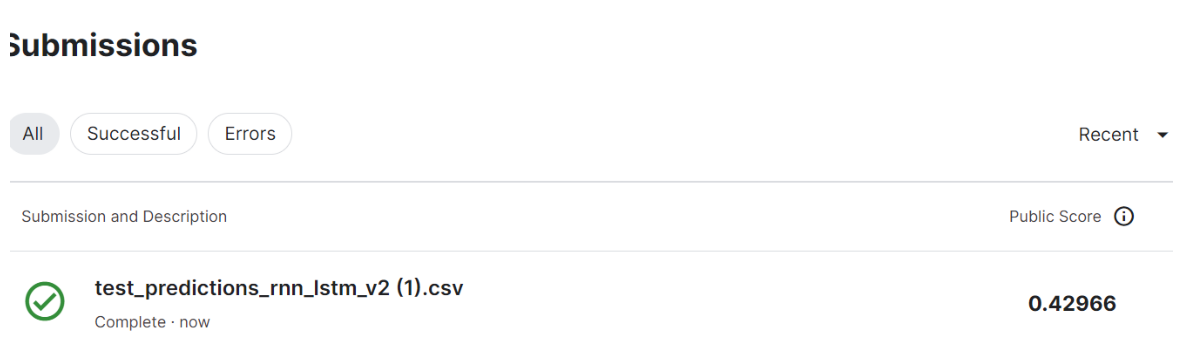

In [37]:
# Display the kaggle results 
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 15))
kaggle_results = plt.imread('Kaggle_results_rnn_lstm_v2.png')
plt.imshow(kaggle_results)
plt.axis("off")
plt.show()

## Model 3

We must load the libraries that will be needed for the model

In [157]:
#pip install tensorflow_hub

     -------------------------------------- 100.6/100.6 kB 5.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [158]:
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from tensorflow.strings import substr
from tensorflow.strings import regex_replace
from tensorflow.strings import split
import tensorflow_hub as hub

In [159]:
# Create copy of the model2_train_df and model2_test_df dataframes
model3_train_df = model2_train_df.copy(deep=True)
model3_test_df = model2_test_df.copy(deep=True)

# Convert tweet text from lists into strings
model3_train_df['text_string'] = [' '.join(map(str, l)) for l in model3_train_df['text']]
model3_test_df['text_string'] = [' '.join(map(str, l)) for l in model3_test_df['text']]

# Drop the columns that include the tweets as lists from the training and testing dataframes
model3_train_df.drop(['text'], axis=1, inplace=True)
model3_test_df.drop(['text'], axis=1, inplace=True)

model3_train_df
model3_test_df

,target,text_string
0,1,deed reason earthquake may allah forgive u unk...
1,1,forest fire near la ronge sask canada unknown ...
2,1,resident asked place notified officer evacuati...
3,1,people receive wildfire evacuation order calif...
4,1,got sent photo ruby alaska smoke wildfire pour...
...,...,...
7608,1,two giant crane holding bridge collapse nearby...
7609,1,thetawniest control wild fire california even ...
7610,1,utc volcano hawaii unknown unknown
7611,1,police investigating collided car little portu...


,text_string
0,happened terrible car crash unknown unknown
1,heard earthquake different city stay safe ever...
2,forest fire spot pond goose fleeing across str...
3,apocalypse lighting spokane wildfire unknown u...
4,typhoon soudelor kill china taiwan unknown unk...
...,...
3258,earthquake safety los angeles safety fastener ...
3259,storm ri worse last hurricane city amp hardest...
3260,green line derailment chicago unknown unknown
3261,meg issue hazardous weather outlook hwo unknow...


We must pre-process the disaster tweet data to prepare it for the LSTM model

In [160]:
# Define parameters
max_features = 20000
maxlen = 40
batch_size = 40

# Isolate the text data and outputs for prediction
from sklearn.model_selection import train_test_split

training_tweet_text = model3_train_df['text_string']
training_tweet_text = np.array(training_tweet_text)
training_tweet_text = training_tweet_text.reshape(-1)

training_tweet_label = model3_train_df['target']
training_tweet_label = np.array(training_tweet_label)
training_tweet_label = training_tweet_label.reshape(-1)

# Split the training data into training and validation data
x_train_v3, x_validation_v3, y_train_v3, y_validation_v3 = train_test_split(training_tweet_text, 
                                                                            training_tweet_label,
                                                                            test_size=0.2,
                                                                            random_state=10)


In [161]:
# Tokenize and Pre-process the training, validation, and testing data ahead of fitting RNN / LSTM model

# create the tokenizer
t = Tokenizer()

# fit the tokenizer on the documents
t.fit_on_texts(x_train_v3)

# summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)

# integer encode documents
encoded_docs_train = t.texts_to_matrix(x_train_v3, mode='tfidf')
print(encoded_docs_train)


OrderedDict([('amp', 278), ('think', 68), ('possibility', 1), ('full', 72), ('transformation', 2), ('impossible', 3), ('quite', 9), ('like', 281), ('medical', 6), ('mystery', 6), ('bioterrorism', 46), ('suck', 5), ('unknown', 2039), ('debris', 71), ('confirmed', 35), ('relative', 5), ('hope', 44), ('discovery', 2), ('crash', 120), ('site', 25), ('malaysian', 5), ('official', 44), ('confirm', 6), ('breakth', 1), ('tampa', 10), ('fl', 50), ('know', 107), ('question', 13), ('interpretation', 1), ('sign', 31), ('apocalypse', 53), ('called', 14), ('austin', 14), ('tx', 47), ('california', 165), ('spring', 23), ('oil', 76), ('spill', 37), ('estimate', 7), ('grows', 8), ('document', 6), ('released', 33), ('wednesday', 15), ('disclosed', 1), ('sp', 6), ('goa', 1), ('india', 68), ('also', 38), ('iphone', 7), ('charger', 4), ('broken', 10), ('electrocuted', 55), ('newcastle', 9), ('england', 57), ('pandemonium', 55), ('aba', 10), ('woman', 69), ('delivers', 11), ('baby', 35), ('without', 40), ('

[[0.         1.39602619 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.39602619 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 8.01664788 8.01664788 8.01664788]]


In [162]:
# Apply Tokenizer to the validation and testing data as well
encoded_docs_validation = t.texts_to_matrix(x_validation_v3, mode='tfidf')

testing_tweet_text = model3_test_df['text_string']
testing_tweet_text = np.array(testing_tweet_text)
testing_tweet_text = testing_tweet_text.reshape(-1)

encoded_docs_testing = t.texts_to_matrix(testing_tweet_text, mode='tfidf')

Next, we apply padding to the predictive data sequences

In [80]:
from keras import utils
x_train_v3 = utils.pad_sequences(encoded_docs_train, maxlen = maxlen)
x_validation_v3 = utils.pad_sequences(encoded_docs_validation, maxlen = maxlen)
x_test_v3 = utils.pad_sequences(encoded_docs_testing, maxlen = maxlen)
print(len(x_train_v3), 'train sequences')
print(len(x_validation_v3), 'validation sequences')
print(len(x_test_v3), 'test sequences')

6060 train sequences
1515 validation sequences
3263 test sequences


Now we define, compile, and fit the LSTM model

In [81]:
# Define the model
model_v3 = Sequential()
model_v3.add(Embedding(max_features, 128))
model_v3.add(LSTM(128, dropout = 0.2, recurrent_dropout = 0.2))
model_v3.add(Dense(1, activation = 'sigmoid'))

# Compile the model
model_v3.compile(loss='binary_crossentropy', 
              optimizer='adam',
             metrics=['accuracy'])

# Fit the model
model_v3.fit(x_train_v3,
          y_train_v3,
          batch_size = batch_size,
          epochs = 10,
          validation_data = (x_validation_v3, y_validation_v3))

Epoch 1/10
152/152 [==============================] - 19s 101ms/step - loss: 0.6855 - accuracy: 0.5658 - val_loss: 0.6804 - val_accuracy: 0.5822
Epoch 2/10
152/152 [==============================] - 15s 96ms/step - loss: 0.6855 - accuracy: 0.5658 - val_loss: 0.6832 - val_accuracy: 0.5822
Epoch 3/10
152/152 [==============================] - 24s 161ms/step - loss: 0.6848 - accuracy: 0.5660 - val_loss: 0.6796 - val_accuracy: 0.5822
Epoch 4/10
152/152 [==============================] - 17s 109ms/step - loss: 0.6848 - accuracy: 0.5660 - val_loss: 0.6803 - val_accuracy: 0.5822
Epoch 5/10
152/152 [==============================] - 15s 100ms/step - loss: 0.6849 - accuracy: 0.5660 - val_loss: 0.6803 - val_accuracy: 0.5822
Epoch 6/10
152/152 [==============================] - 15s 98ms/step - loss: 0.6848 - accuracy: 0.5660 - val_loss: 0.6797 - val_accuracy: 0.5822
Epoch 7/10
152/152 [==============================] - 20s 129ms/step - loss: 0.6850 - accuracy: 0.5660 - val_loss: 0.6803 - val_accu

Having defined the model, we apply the model to the validation dataset, so that we can assess predictive performance measures and construct precision-recall and receiving operating characteristic (ROC) curves.

38/38 [==============================] - 0s 11ms/step - loss: 0.6797 - accuracy: 0.5815
Score of Validation dataset predictions: 0.6797328591346741
Accuracy of Validation dataset predictions: 0.5815181732177734
48/48 [==============================] - 1s 12ms/step


Text(0.5, 1.0, 'ROC Curve')

The roc auc score is: 0.5


Text(0.5, 1.0, 'Precision-Recall Curve')

The prec-recall auc score is: 0.20904887714663145


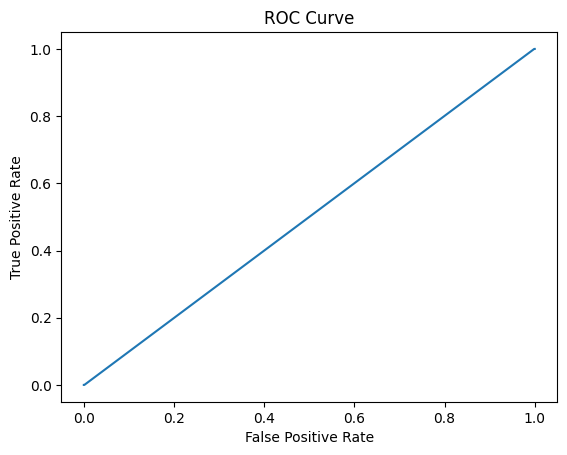

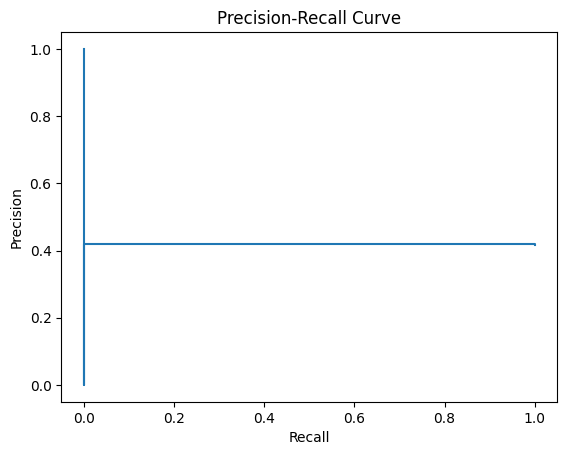

In [82]:
# Evaluate the model's performance on the validation dataset
score, accuracy = model_v3.evaluate(x_validation_v3,
                               y_validation_v3,
                               batch_size = batch_size)

print('Score of Validation dataset predictions:', score)
print('Accuracy of Validation dataset predictions:', accuracy)


# Apply the model to the validation dataset
rnn_lstm_predictions_validation_v3 = model_v3.predict(x_validation_v3, verbose = 1)

#rnn_lstm_predictions_validation_v3 = model_v3.predict_classes(x_validation_v3, verbose = 1)


# Put the label predictions into a dataframe
rnn_lstm_predictions_validation_v3_df = pd.DataFrame(rnn_lstm_predictions_validation_v3, columns=['label'])

rnn_lstm_predictions_validation_v3_array = rnn_lstm_predictions_validation_v3_df['label'].to_numpy()

from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve
import matplotlib.pyplot as plt


# Curves
true_y = y_validation_v3
predicted_y = rnn_lstm_predictions_validation_v3_array

fpr, tpr, _ = roc_curve(true_y, predicted_y)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('ROC Curve')
# roc auc score
auc1 = roc_auc_score(true_y, predicted_y)
print("The roc auc score is:", auc1)

prec, recall, _ = precision_recall_curve(true_y, predicted_y)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
plt.title('Precision-Recall Curve')# precision-recall auc score
auc2 = auc(recall, prec)
print("The prec-recall auc score is:", auc2)

Let's find the cutoff value for assigning zeros and ones (based on the outputs of the LSTM model) that maximizes the accuracy for the validation dataset

In [83]:
rnn_lstm_predictions_validation_v3_df.rename(columns={"label": "predicted_label"}, inplace=True)
rnn_lstm_predictions_validation_v3_df

y_validation_v3_df = pd.DataFrame(y_validation_v3, columns = ['true_label'])
y_validation_v3_df

validation_df = y_validation_v3_df.join(rnn_lstm_predictions_validation_v3_df)


Positives = validation_df[validation_df["true_label"].isin([1])]
Negatives = validation_df[validation_df["true_label"].isin([0])]

Positive_Count = Positives.shape[0]
Negative_Count = Negatives.shape[0]

Prediction_Cutoff = np.arange(0, 1, 0.0001).tolist()
Cutoff_df = pd.DataFrame(Prediction_Cutoff, columns=['Prediction_Cutoff'])

Sensitivity_List = []
False_Positive_List = []
Precision_List = []

for pc in Cutoff_df['Prediction_Cutoff']:
    true_positive_count = (Positives['predicted_label'] >= pc).sum()
    Sensitivity_List.append(true_positive_count / Positive_Count)
    false_positive_count = (Negatives['predicted_label'] >= pc).sum()
    False_Positive_List.append(false_positive_count / Negative_Count)
    Precision_List.append(true_positive_count / (true_positive_count + false_positive_count))     

Cutoff_df['Sensitivity'] = Sensitivity_List
Cutoff_df['False Positive Rate'] = False_Positive_List
Cutoff_df['Precision'] = Precision_List


,predicted_label
0,0.421283
1,0.421283
2,0.421283
3,0.421283
4,0.421283
...,...
1510,0.421283
1511,0.421283
1512,0.421283
1513,0.421283


,true_label
0,1
1,0
2,1
3,0
4,0
...,...
1510,0
1511,1
1512,0
1513,1


C:\Users\steve\AppData\Local\Temp\ipykernel_45324\393894093.py:28: RuntimeWarning: invalid value encountered in scalar divide
  Precision_List.append(true_positive_count / (true_positive_count + false_positive_count))


In [84]:
Cutoff_df['Specificity'] = 1 - Cutoff_df['False Positive Rate'] 
Cutoff_df['Percent_Correctly_Predicted_In_Validation_DF'] = ( ( Positives.shape[0] * Cutoff_df['Specificity'] ) + (Negatives.shape[0] * Cutoff_df['Sensitivity']) ) / (Positives.shape[0] + Negatives.shape[0] )

Cutoff_Shortlist_df = Cutoff_df[Cutoff_df.Percent_Correctly_Predicted_In_Validation_DF == Cutoff_df.Percent_Correctly_Predicted_In_Validation_DF.max()]

Optimal_Cutoff = Cutoff_Shortlist_df['Prediction_Cutoff'].median()

print(f"The optimal cutoff boundary for predicting survivals for this model is {Optimal_Cutoff:.4f}.")

The optimal cutoff boundary for predicting survivals for this model is 0.4212.


Now we apply the model to the test dataset

In [85]:
# Apply the cnn model to the test dataset
rnn_lstm_predictions_test_v3 = model_v3.predict(x_test_v3, verbose = 1)

# Put the label predictions into a dataframe
rnn_lstm_pred3_df = pd.DataFrame(rnn_lstm_predictions_test_v3, columns=['prediction'])

# Convert predictions into 1s and 0s
rnn_lstm_pred3_df['target'] = np.where(rnn_lstm_pred3_df['prediction'] < 0.4212, 0, 1)

# Drop the raw prediction value and just keep the new target value (of zeros and ones)
rnn_lstm_pred3_df.drop(columns = 'prediction', inplace=True)

rnn_lstm_pred3_df

102/102 [==============================] - 1s 12ms/step


,target
0,1
1,1
2,1
3,1
4,1
...,...
3258,1
3259,1
3260,1
3261,1


Now we save the test dataset predictions to a CSV for submission into Kaggle

In [86]:

# Add the ID column to the front of the cnn predictions dataframe
rnn_lstm_pred3_df.insert(0, 'id', disaster_testing_data['id'])

# Output predictions to csv
rnn_lstm_pred3_df.to_csv('test_predictions_rnn_lstm_v3.csv', index=False)

Having submitted our predicitons into Kaggle, we now display the score obtained

<Figure size 1500x1500 with 0 Axes>

(-0.5, 1026.5, 239.5, -0.5)

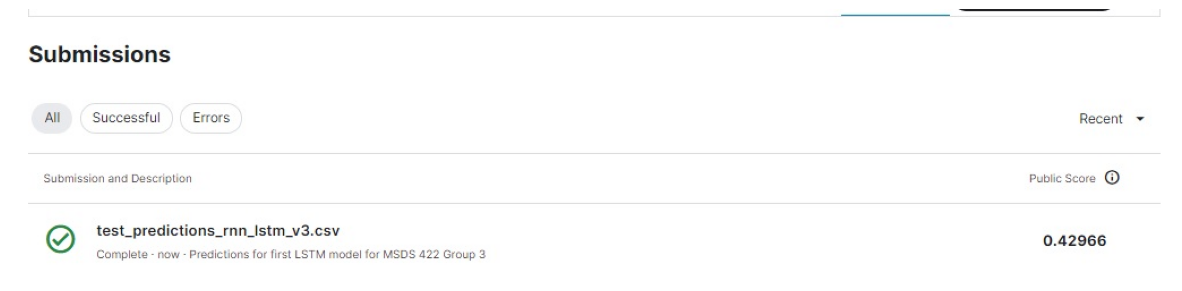

In [88]:
# Display the kaggle results 
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 15))
kaggle_results = plt.imread('Kaggle_results_rnn_lstm_v3.jpg')
plt.imshow(kaggle_results)
plt.axis("off")
plt.show()

### Third Model - Julia

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import spacy
import re
#import nltk
import seaborn as sns

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import model_selection, naive_bayes
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MaxAbsScaler
from scipy import stats
from sklearn.metrics import make_scorer, roc_auc_score
from scipy.linalg import svd
from numpy import diag
from scipy.sparse import csr_matrix

from numpy import zeros
from sklearn import svm

#from nlp_functions import *
from sklearn import preprocessing

C:\Users\steve\anaconda3\envs\tf-new\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
#
# NLP Helper Functions
#
# The Python Quants GmbH
#
import re
import nltk
nltk.download('stopwords')
import string
import pandas as pd
from pylab import plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from lxml.html.clean import Cleaner
from sklearn.feature_extraction.text import TfidfVectorizer
plt.style.use('seaborn')

cleaner = Cleaner(style=True, links=True, allow_tags=[''],
                  remove_unknown_tags=False)

stop_words = stopwords.words('english')
stop_words.extend(['new', 'old', 'pro', 'open', 'menu', 'close'])


def remove_non_ascii(s):
    ''' Removes all non-ascii characters.
    '''
    return ''.join(i for i in s if ord(i) < 128)

def clean_up_html(t):
    t = cleaner.clean_html(t)
    t = re.sub('[\n\t\r]', ' ', t)
    t = re.sub(' +', ' ', t)
    t = re.sub('<.*?>', '', t)
    t = remove_non_ascii(t)
    return t

def clean_up_text(t, numbers=False, punctuation=False):
    ''' Cleans up a text, e.g. HTML document,
        from HTML tags and also cleans up the 
        text body.
    '''
    try:
        t = clean_up_html(t)
    except:
        pass
    t = t.lower()
    t = re.sub(r"what's", "what is ", t)
    t = t.replace('(ap)', '')
    t = re.sub(r"\'ve", " have ", t)
    t = re.sub(r"can't", "cannot ", t)
    t = re.sub(r"n't", " not ", t)
    t = re.sub(r"i'm", "i am ", t)
    t = re.sub(r"\'s", "", t)
    t = re.sub(r"\'re", " are ", t)
    t = re.sub(r"\'d", " would ", t)
    t = re.sub(r"\'ll", " will ", t)
    t = re.sub(r'\s+', ' ', t)
    t = re.sub(r"\\", "", t)
    t = re.sub(r"\'", "", t)    
    t = re.sub(r"\"", "", t)
    if numbers:
        t = re.sub('[^a-zA-Z ?!]+', '', t)
    if punctuation:
        t = re.sub(r'\W+', ' ', t)
    t = remove_non_ascii(t)
    t = t.strip()
    return t

def nltk_lemma(word):
    ''' If one exists, returns the lemma of a word.
        I.e. the base or dictionary version of it.
    '''
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
def tokenize(text, min_char=3, lemma=True, stop=True,
             numbers=False):
    ''' Tokenizes a text and implements some
        transformations.
    '''
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if len(t) >= min_char]
    if numbers:
        tokens = [t for t in tokens if t[0].lower()
                  in string.ascii_lowercase]
    if stop:
        tokens = [t for t in tokens if t not in stop_words]
    if lemma:
        tokens = [nltk_lemma(t) for t in tokens]
    return tokens

def generate_word_cloud(text, no, name=None):
    ''' Generates a word cloud bitmap given a
        text document (string).
        It uses the Term Frequency (TF) and
        Inverse Document Frequency (IDF) 
        vectorization approach to derive the
        importance of a word -- represented
        by the size of the word in the word cloud.
        
    Parameters
    ==========
    text: str
        text as the basis
    no: int
        number of words to be included
    '''
    tokens = tokenize(text)
    vec = TfidfVectorizer(min_df=2,
                      analyzer='word',
                      ngram_range=(1, 2),
                      stop_words='english'
                     )
    vec.fit_transform(tokens)
    wc = pd.DataFrame({'words': vec.get_feature_names(),
                       'tfidf': vec.idf_})
    words = ' '.join(wc.sort_values('tfidf', ascending=True)['words'].head(no))
    wordcloud = WordCloud(max_font_size=110,
                      background_color='white',
                      width=1024, height=768,
                      margin=10, max_words=150).generate(words)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    if name is not None:
        plt.imsave(name, wordcloud)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

C:\Users\steve\AppData\Local\Temp\ipykernel_27012\2354002922.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

from gensim.models import Word2Vec, Doc2Vec, FastText
from gensim.models.doc2vec import TaggedDocument
from gensim.models.phrases import Phraser, Phrases

from mpl_toolkits.mplot3d import Axes3D

from collections import defaultdict
import matplotlib.pyplot as plt
import tensorflow as tf




# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

def pre_process(df):
    
    """ Preprocess
        ----------

        The main preprocess pipeline for my NLP
        projects. This functional pipeline has
        proven affective over a number of NLP
        tasks
         and continues to serve me well (that
        is until the great rising when functions
        will rule the world).

        A number of steps are completed, accompanied
        by a small comment explaining what is happening.

        If you find this pipeline useful please use it. 

        Input: Df - Pandas Dataframe 
               Dataframe with a text column that needs
               to be cleaned. 

               col_name - String
               The name of the column that needs to be
               cleaned.
    
        Output: Df - Pandas Dataframe
                Dataframe that includes a new cleaned 
                "col_name" column. THis function does
                not remove the original feature. 

    
    """
    
    # First thing to do is reset the index for all entries, this needs to be done for
    # the final step where a list of lemmatised words is built up and then used to 
    # replace the text value in the twitter dataframe. 
    
    df = df.reset_index()
    
    # Next change is lower case using apply and lambda function
    
    df['text'] = df['text'].apply(lambda x: x.lower())
    
    # Next we need to tokenise the text in the tweets then remove them from list.
    
    df['text'] = df['text'].apply(lambda x: word_tokenize(x))

    # Cool, so all messages are now stored in seperate lists that have been tokenised
    
    # Now to remove stopwords, lemmatisation and stemming
    
    # We need p.o.s (part of speech) tags to understand if its a noun or a verb
    
    tag_map = defaultdict(lambda: wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV
    
    # Next iterate over each entry in the text column
    
    for index, entry in enumerate(df['text']):
        
        # Create list to hold final lemmetized words
        
        final_words = ""
        
        # Instantiate the lemmatizer
        
        word_lem = WordNetLemmatizer()
        
        # Loop over the entry in the text column.
        
        for word, tag in pos_tag(entry):
            
            # If the word is not in the stopword and is not alphanumeric add it to final words
            
            if word not in stopwords.words('english') and word.isalpha() and word != 'http':
                
                # Run our lemmatizer on the word.
                
                word_final = str(word_lem.lemmatize(word, tag_map[tag[0]]))
                
                # Now add to final words
                
                final_words += word_final + " "
        
        # Once we've looped over all words in the entry we replace that entry with our
        # final words list. 
        
        df.loc[index, 'text'] = str(final_words)
        
    # Need a final adjustment to drop the newly created index column
    
    df = df.drop(columns=['index'])
    
    
    return df


def plot_vectors(svd_df, disaster_tweets):
    
    """ Plot Vectors
        ------------

        Creates a static 3d plot

        Input
        -----

        pcs_df: Pandas Dataframe
                Dataframe of pca_values
                Note: this function is
                not flexible.

                TODO: Generlise this. 

        Output
        ------

        Displays 3d plot.
    
    
    """
    
    fig = plt.figure()

    fig = plt.figure(figsize=(25, 20))
    ax = fig.add_subplot(111, projection='3d')

    xs = svd_df['svd_one']
    ys = svd_df['svd_two']
    zs = svd_df['svd_three']

    ax.scatter(xs, ys, zs, c=disaster_tweets['target'], cmap='plasma')
    plt.title("Visualisation of Word Embeddings Using Singular Value Decomposition: Hue - Target")

        
    ax.set_xlabel("SVD 1")
    ax.set_ylabel("SVD 2")
    ax.set_zlabel("SVD 3")

    plt.show()
    
def drop_columns(df):
    
    """ Drop Columns Function
        
        input: df
               DataFrame of disaster tweets
    
        output: df
                Transformed dataframe with columns dropped.
    
    """
    
    df = df.drop(columns=['id', 'keyword', 'location'])
    return df

def encode_train(text_tensor, label):
    text = text_tensor.numpy()[0]
    encoded_text = encoder.encode(text)
    return encoded_text, label

def encode_map_fn_train(text, label):
    return tf.py_function(encode_train, inp=[text, label], Tout=(tf.int64, tf.int64))

def encode_unseen(text_tensor):
    text = text_tensor.numpy()[0]
    encoded_text = encoder.encode(text)
    return encoded_text, 1

def encode_map_fn_unseen(text):
    return tf.py_function(encode_unseen, inp=[text], Tout=(tf.int64, 1))

In [32]:
import tensorflow_datasets as tfds

disaster_original = pre_process(pd.read_csv('train.csv'))
#disaster_original = pd.read_csv('train.csv')
unseen_data = pd.read_csv('test.csv')

unseen_text = unseen_data['text']
disaster_text = disaster_original['text']
all_tweets_concat = pd.concat([unseen_text, disaster_text], axis=0)

disaster_tweets = disaster_original.copy()

target = disaster_tweets.pop('target')
tweets_raw = tf.data.Dataset.from_tensor_slices((np.asarray(disaster_tweets.values).astype('str'), np.asarray(target.values).astype('int64')))
tweets_unseen = tf.data.Dataset.from_tensor_slices((np.asarray(unseen_data.values).astype('str')))
unseen_raw_all = tf.data.Dataset.from_tensor_slices((all_tweets_concat.values))

for tw in tweets_raw.take(3):
    tf.print(tw[0].numpy(), tw[1])
    
tweets_raw = tweets_raw.shuffle(7613, reshuffle_each_iteration=False)
tweets_valid = tweets_raw.take(2283)
tweets_train = tweets_raw.skip(2283)

tokenizer = tfds.deprecated.text.Tokenizer()
token_counts = Counter()

for example in unseen_raw_all:
    tokens = tokenizer.tokenize(example.numpy())
    token_counts.update(tokens)

print(f"Vocab SIze: {len(token_counts)}")

encoder = tfds.deprecated.text.TokenTextEncoder(token_counts)
example_string = "This is an example"
print(f"Exmaple String: {example_string}")
print(f"Encoded String: {encoder.encode(example_string)}")

tweets_train = tweets_train.map(encode_map_fn_train)
tweets_valid = tweets_valid.map(encode_map_fn_train)
tweets_unseen_map = tweets_unseen.map(encode_map_fn_unseen)

print("Example Sequences and their length:\n")
example = tweets_train.take(8)
for ex in example:
    print(f"Individual Size: {ex[0].shape}")

print("Batched examples and the sequence length:\n")
batched_example = example.padded_batch(4, padded_shapes=([-1], []))
for batch in batched_example:
    print(f"Batch dimension: {batch[0].shape}")

tweets_train = tweets_train.padded_batch(32, padded_shapes=([-1], []))
tweets_valid = tweets_valid.padded_batch(32, padded_shapes=([-1], []))
tweets_unseen_batched = tweets_unseen_map.padded_batch(32, padded_shapes=([-1], []))

embedding_dimension = 200
vocab_size = len(token_counts) + 2

tf.random.set_seed(42)

array([b'1', b'nan', b'nan',
       b'deed reason earthquake may allah forgive u '], dtype=object) 1
array([b'4', b'nan', b'nan', b'forest fire near la ronge sask canada '],
      dtype=object) 1
array([b'5', b'nan', b'nan',
       b'resident ask place notify officer evacuation shelter place order expect '],
      dtype=object) 1
Vocab SIze: 24751
Exmaple String: This is an example
Encoded String: [2165, 10, 50, 809]
Example Sequences and their length:

Individual Size: (1,)
Individual Size: (1,)
Individual Size: (1,)
Individual Size: (1,)
Individual Size: (1,)
Individual Size: (1,)
Individual Size: (1,)
Individual Size: (1,)
Batched examples and the sequence length:

Batch dimension: (4, 1)
Batch dimension: (4, 1)


In [33]:
bi_lstm_model = tf.keras.Sequential([
    
    tf.keras.layers.Embedding(
        
        input_dim=vocab_size,
        output_dim=embedding_dimension,
        name='embed-layer'),
    
    tf.keras.layers.Bidirectional(
        
        tf.keras.layers.LSTM(64, name='lstm-layer'),
        name='bidir-lstm'),
    
    tf.keras.layers.Dense(64, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

bi_lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embed-layer (Embedding)     (None, None, 200)         4950600   
                                                                 
 bidir-lstm (Bidirectional)  (None, 128)               135680    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,094,601
Trainable params: 5,094,601
Non-trainable params: 0
_________________________________________________________________


In [34]:
bi_lstm_model.compile(optimizer=tf.keras.optimizers.Nadam(1e-3),
                     loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                     metrics=['accuracy'])

history = bi_lstm_model.fit_generator(tweets_train, validation_data=tweets_valid,
                           epochs=3, callbacks=[keras.callbacks.EarlyStopping(patience=8)])

Epoch 1/3


C:\Users\steve\AppData\Local\Temp\ipykernel_27012\1703794884.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = bi_lstm_model.fit_generator(tweets_train, validation_data=tweets_valid,


167/167 [==============================] - 11s 35ms/step - loss: 0.6857 - accuracy: 0.5677 - val_loss: 0.6829 - val_accuracy: 0.5747
Epoch 2/3
167/167 [==============================] - 4s 25ms/step - loss: 0.6845 - accuracy: 0.5702 - val_loss: 0.6830 - val_accuracy: 0.5747
Epoch 3/3
167/167 [==============================] - 5s 28ms/step - loss: 0.6813 - accuracy: 0.5764 - val_loss: 0.6851 - val_accuracy: 0.5721


In [35]:
predictions = history.model.predict(tweets_unseen_batched, batch_size=None)

output_df = pd.DataFrame(unseen_data['id'])
output_df['target'] = predictions

out = output_df.to_csv('RNN.csv')

102/102 [==============================] - 2s 9ms/step
